In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_csv(r"F:\Project_3\kidney_disease - kidney_disease.csv")

In [76]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [78]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [79]:
print(df.shape)
df['classification'].unique()

(400, 26)


array(['ckd', 'notckd'], dtype=object)

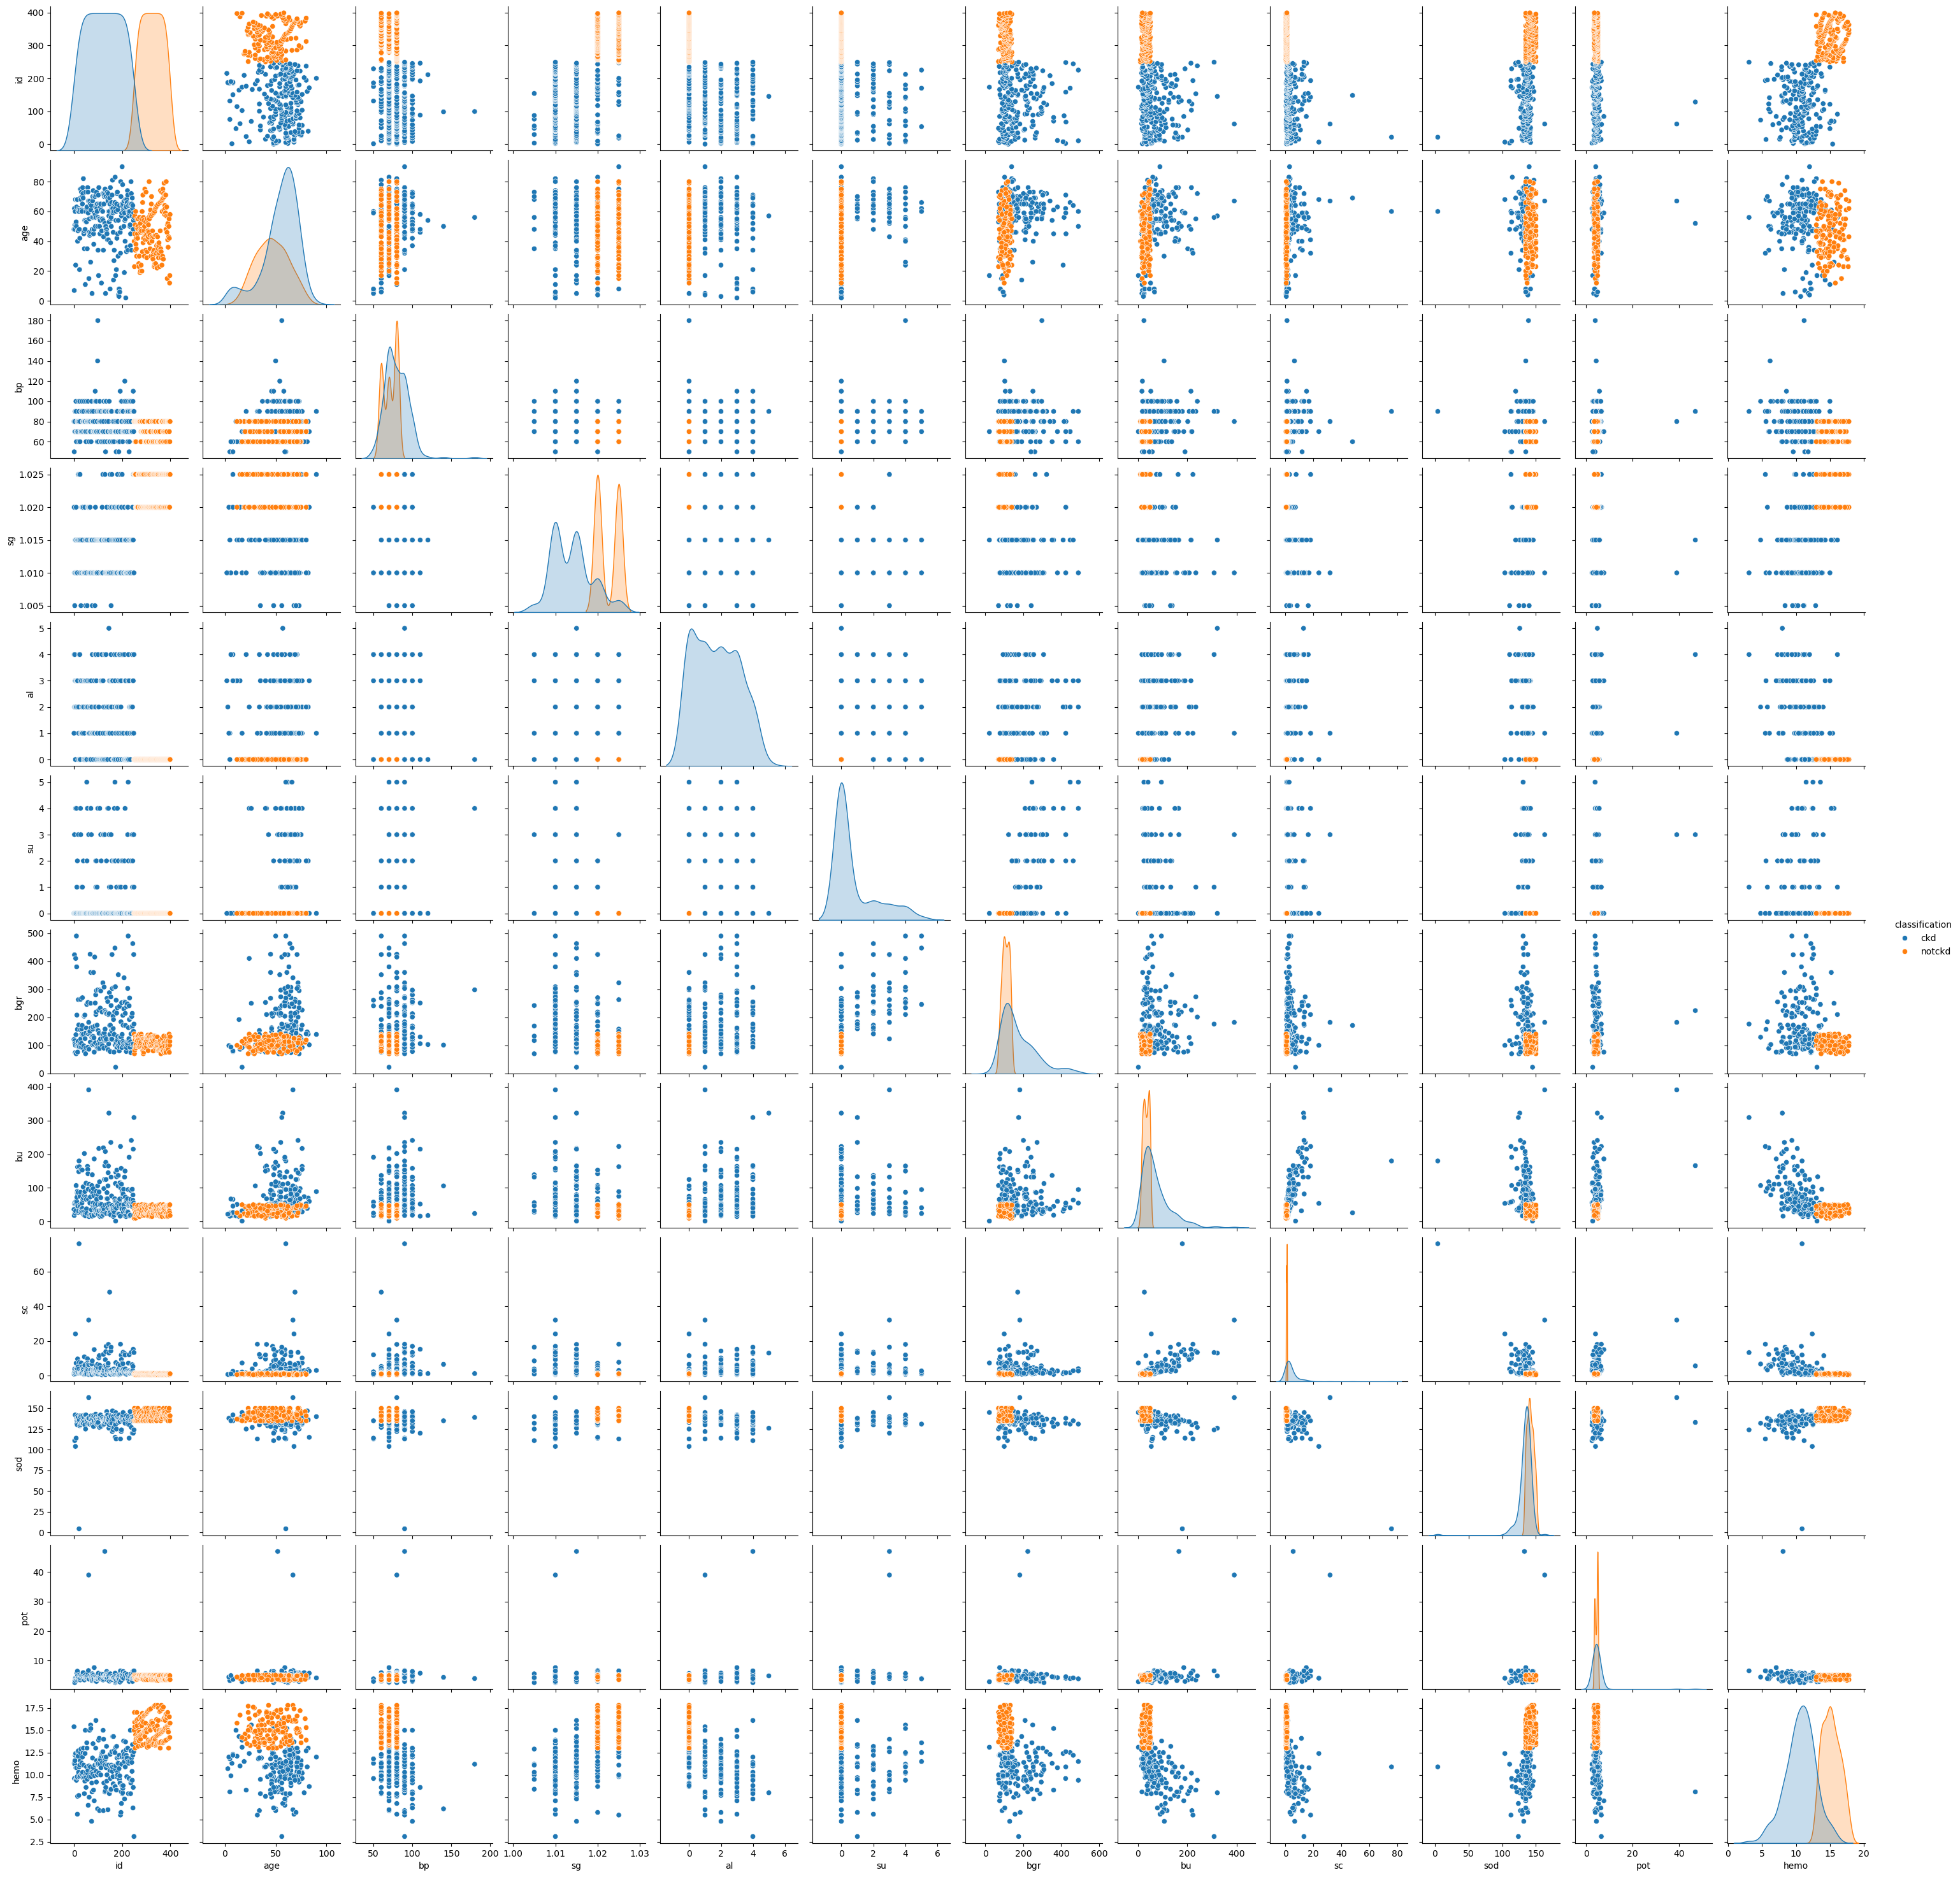

In [80]:
sns.pairplot(df, hue='classification')  # Ensure 'classification' is categorical or numeric
plt.show()


In [81]:

df.isnull().sum()
     

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [106]:
df_drop = df.dropna(axis=0)
print(f"Data shape before deletion: {df.shape}")
print(f"Data shape after deletion: {df_drop.shape}")

Data shape before deletion: (400, 26)
Data shape after deletion: (158, 26)


In [108]:
df.classification = df.classification.replace("ckd\t","ckd")
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [110]:
df_drop.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [112]:
for i in df_drop['wc']:
  i
     


In [114]:
df_drop['wc']=df_drop['wc'].replace(["\t6200","\t8400"],[6200,8400])

In [116]:
for i in df_drop['wc']:
  print(i)

6700
12100
4500
11000
9200
6900
9600
18900
7200
14600
6400
6200
3800
9800
12500
5600
7000
15200
5000
16300
8400
10500
15200
14600
7900
10900
12800
12400
19100
7500
16700
9600
26400
9800
8800
7400
12000
7500
15700
11500
5000
10200
5400
10400
9800
9100
6200
8300
9200
10700
9100
8400
4300
9400
5600
7200
8600
5000
10500
6800
9500
6900
7200
9000
5600
4700
6300
9400
5800
9100
5500
6700
5300
9800
7100
7000
10200
6300
8600
11000
7200
6200
9100
4300
7900
6900
11000
7500
8200
9400
8100
7000
10400
9600
7800
6700
8300
10700
7800
6700
4300
10700
7500
4700
7000
6700
7300
7700
5500
8100
7900
7200
7300
9900
7000
5800
6800
6300
7400
11000
5200
6000
5800
5400
10300
9300
10500
6700
9400
10300
9300
6500
10500
9200
8000
9700
9100
6400
5400
6500
6000
5100
11000
8000
5700
6200
9500
7200
6300
5800
6600
7400
9500
6700
7800
6600
7200
6800


In [118]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    object 


In [120]:

df_drop.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [122]:
df_drop['pcv'] = df_drop['pcv'].astype('int')
df_drop['wc'] = df_drop['wc'].astype('int')
df_drop['rc'] = df_drop['rc'].astype('float')

In [124]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    int32  
 17  wc              158 non-null    int32  


In [126]:

object_df_drop = df_drop.select_dtypes(include='object')
object_df_drop.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
9,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes,ckd
11,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no,ckd
14,normal,abnormal,present,present,yes,yes,yes,poor,yes,no,ckd
20,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes,ckd


In [128]:
dictonary = {
    "rbc":{
        "normal":0,
        "abnormal":1,
    },
    "pc":{
        "normal":0,
        "abnormal":1,
    },
    "pcc":{
        "present":1,
        "notpresent":0,
    },
    "ba":{
        "notpresent":0,
        "present":1,
    },
    "htn":{
        "yes":1,
        "no":0,
    },
    "dm":{
        "yes":1,
        "no":0,
    },
    "cad":{
        "yes":1,
        "no":0,
    },
    "appet":{
        "good":1,
        "poor":0,
    },
    "pe":{
        "yes":1,
         "no":0,
    },
    "ane":{
        "yes":1,
        "no":0,
    }
}

In [130]:
df_drop = df_drop.replace(dictonary)
df_drop.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,9,53.0,90.0,1.020,2.0,0.0,1,1,1,0,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,11,63.0,70.0,1.010,3.0,0.0,1,1,1,0,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,14,68.0,80.0,1.010,3.0,2.0,0,1,1,1,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,20,61.0,80.0,1.015,2.0,0.0,1,1,0,0,...,24,9200,3.2,1,1,1,0,1,1,ckd


In [203]:
X = df_drop.drop(["sg","sod","hemo","pcv","rc","appet","classification"],axis=1)
y = df_drop['classification']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 3 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      158 non-null    int64  
 1   age     158 non-null    float64
 2   bp      158 non-null    float64
 3   al      158 non-null    float64
 4   su      158 non-null    float64
 5   rbc     158 non-null    int64  
 6   pc      158 non-null    int64  
 7   pcc     158 non-null    int64  
 8   ba      158 non-null    int64  
 9   bgr     158 non-null    float64
 10  bu      158 non-null    float64
 11  sc      158 non-null    float64
 12  pot     158 non-null    float64
 13  wc      158 non-null    int32  
 14  htn     158 non-null    int64  
 15  dm      158 non-null    int64  
 16  cad     158 non-null    int64  
 17  pe      158 non-null    int64  
 18  ane     158 non-null    int64  
dtypes: float64(8), int32(1), int64(10)
memory usage: 24.1 KB


In [134]:
X.columns

Index(['id', 'age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [136]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=42)

In [139]:
print(f"Size of X_train: {X_train.size}")
print(f"Size of X_test: {X_test.size}")
print(f"Size of y_train: {y_train.size}")
print(f"Size of y_test: {y_test.size}")

Size of X_train: 2394
Size of X_test: 608
Size of y_train: 126
Size of y_test: 32


In [181]:
import pickle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Assuming X and y are already defined
# Encode the target if it's categorical
from sklearn.preprocessing import LabelEncoder
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier (SVC)": SVC(),
    
}

# Initialize a dictionary to store model performance
model_performance = {}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    # Using cross-validation to get a more reliable estimate of performance
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Use accuracy for classification
    mean_accuracy = np.mean(cv_scores)
    model_performance[model_name] = {
        "Mean Accuracy": mean_accuracy,
        "Standard Deviation": np.std(cv_scores)
    }

# Find the best performing model
best_model_name = max(model_performance, key=lambda k: model_performance[k]["Mean Accuracy"])
best_model = models[best_model_name]

# Output model performance and best model
for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {performance['Mean Accuracy']:.2f} (+/- {performance['Standard Deviation']:.2f})\n")

print(f"Best Model: {best_model_name} with Mean Accuracy: {model_performance[best_model_name]['Mean Accuracy']:.2f}")

# Retrain the best model on the entire training data
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Test Accuracy of Best Model: {accuracy_score(y_test, y_pred):.2f}")

# Save the best model to a pickle file
model_filename = r"F:\Project_3\best_model.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)
    print(f"Best model saved as {model_filename}")



Model: Logistic Regression
Mean Accuracy: 0.99 (+/- 0.02)

Model: Random Forest
Mean Accuracy: 0.99 (+/- 0.02)

Model: Gradient Boosting
Mean Accuracy: 0.98 (+/- 0.02)

Model: Decision Tree
Mean Accuracy: 0.98 (+/- 0.02)

Model: Support Vector Classifier (SVC)
Mean Accuracy: 0.79 (+/- 0.05)

Best Model: Logistic Regression with Mean Accuracy: 0.99
Test Accuracy of Best Model: 1.00
Best model saved as F:\Project_3\best_model.pkl


In [183]:

from sklearn.metrics import confusion_matrix , accuracy_score


In [199]:
# Load the model from the pickle file
with open(r'F:\Project_3\best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use loaded_model to make predictions
y_pred = loaded_model.predict(X_test)
print(f"Test Accuracy of Loaded Model: {accuracy_score(y_test, y_pred):.2f}")


Test Accuracy of Loaded Model: 1.00


In [205]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
[[ 9  0]
 [ 0 23]]


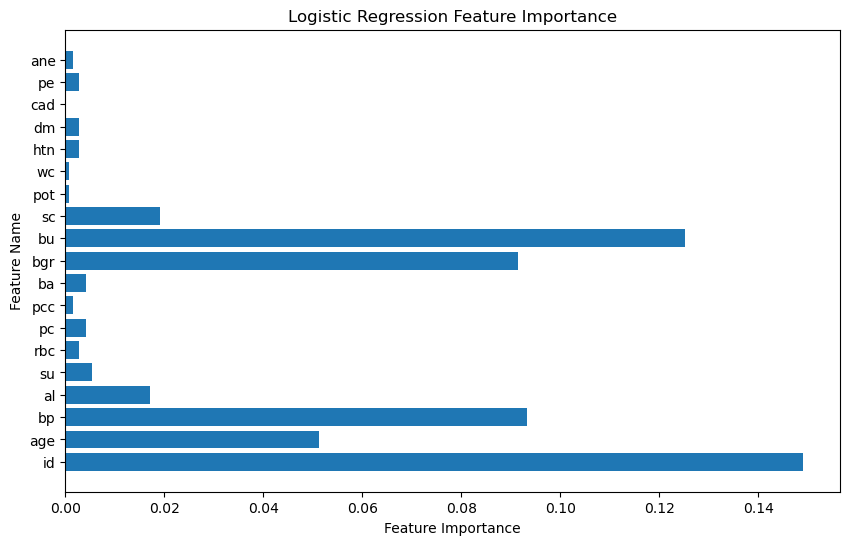

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `best_model` is the trained Logistic Regression model
feature_importance = np.abs(best_model.coef_[0])
feature_names = X_train.columns  # Replace with actual feature names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Logistic Regression Feature Importance")
plt.show()